In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [3]:
X, y = data['data'], data['target']

In [4]:
X[1]

array([  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
         0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
         7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
         2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
         9.14000000e+00])

In [5]:
y[1]

21.600000000000001

In [6]:
len(X[:, 0])

506

In [7]:
len(y)

506

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [10]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

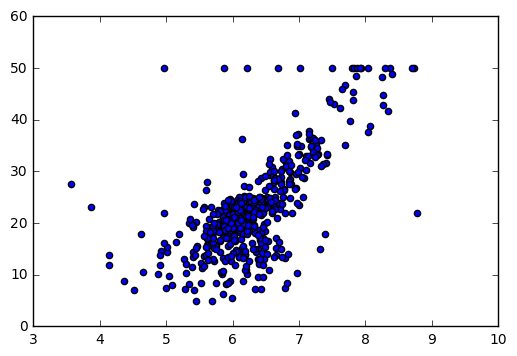

In [11]:
draw_rm_and_price()

In [12]:
import random

In [28]:
#设置y=k*x+b函数
def price(rm,k,b):
    '''f(x)=k*x+b'''
    return k*rm+b

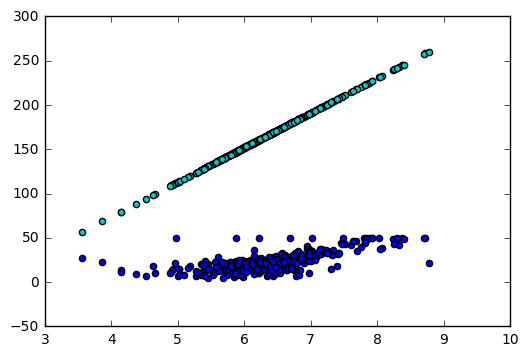

In [61]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b,c='#00CED1')

In [15]:
# loss函数
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [27]:
#1. Random Choose Method to get optimal k and b

In [16]:
random.random()

0.6880680484739093

In [17]:
min_loss=float('inf')

In [18]:
min_loss

inf

In [25]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:  #无论如何，第一次都会经过该判断
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: -78.00912765635056 best_b: 21.48308452717886, and the loss is: 245166.4619248346
When time is : 3, get best_k: 40.793896590351665 best_b: 38.41446358728925, and the loss is: 74661.98640084121
When time is : 7, get best_k: -23.019146516359413 best_b: 55.885711986730854, and the loss is: 12942.76092076972
When time is : 8, get best_k: -10.122586499103178 best_b: 97.01274342336649, and the loss is: 343.70396372161133
When time is : 71, get best_k: -5.515881867570343 best_b: 63.09966823922866, and the loss is: 183.7108753312296
When time is : 111, get best_k: 4.115975283713453 best_b: -6.160476479740112, and the loss is: 63.83532301810925
When time is : 305, get best_k: 10.280257365682033 best_b: -46.16226566829531, and the loss is: 60.99137466304129
When time is : 955, get best_k: 5.509556403459342 best_b: -13.545005808711409, and the loss is: 52.06856225160188
When time is : 991, get best_k: 11.544181513672157 best_b: -50.8140879850619, and the loss is: 47.1

In [ ]:
#选出最合理的一条
#When time is : 991, get best_k: 11.544181513672157 best_b: -50.8140879850619, and the loss is: 47.17235846723978
                

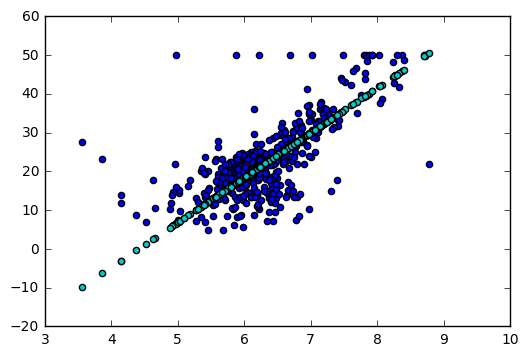

In [67]:
X_rm = X[:, 5]
k = 11.544181513672157
b = -50.8140879850619
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b,c='#00CED1')

In [62]:
# 2 Direction Adjusting

In [80]:
-
        
        trying_times=2000

min_loss = float('inf')

best_k=random.random()*200-100
best_b=random.random()*200-100

direction=[
    (+1,-1),  # first element: k's change direction, second element: b's change direction
    (+1,+1),  
    (-1,+1),
    (-1,-1)
]

next_direction=random.choice(direction)

scalar=0.1

update_time=0

for i in range(trying_times):
    k_direction,b_direction=next_direction
    
    current_k,current_b=best_k+k_direction*scalar,best_b+b_direction*scalar
    
    price_by_k_and_b=[price(r,current_k,current_b) for r in X_rm]
    
    current_loss=loss(y,price_by_k_and_b)
    
    
    if current_loss < min_loss:  # performance became better
        min_loss=current_loss
        best_k,best_b=current_k,current_b
        
        next_direction=next_direction
        update_time+=1
        
        
        if update_time%10==0:
            print('When time is: {},get best_k: {} best_b:{},and the loss is: {}'.format(i,best_k,best_b,min_loss))
    else:
        next_direction=random.choice(direction)

When time is: 10,get best_k: -61.42219313190752 best_b:-43.537579070998255,and the loss is: 206876.23187486283
When time is: 20,get best_k: -60.422193131907505 best_b:-42.53757907099824,and the loss is: 200273.7280426109
When time is: 30,get best_k: -59.42219313190749 best_b:-41.53757907099823,and the loss is: 193778.34139710572
When time is: 40,get best_k: -58.42219313190748 best_b:-40.53757907099821,and the loss is: 187390.07193834754
When time is: 50,get best_k: -57.42219313190746 best_b:-39.5375790709982,and the loss is: 181108.91966633653
When time is: 60,get best_k: -56.42219313190745 best_b:-38.537579070998184,and the loss is: 174934.8845810725
When time is: 70,get best_k: -55.422193131907434 best_b:-37.53757907099817,and the loss is: 168867.96668255553
When time is: 80,get best_k: -54.42219313190742 best_b:-36.537579070998156,and the loss is: 162908.165970786
When time is: 90,get best_k: -53.422193131907406 best_b:-35.53757907099814,and the loss is: 157055.48244576293
When time

In [81]:
# 3.Gradient Descent to get optimal k and b  and learnning rate

In [82]:
def partial_k(x,y,y_hat):
    n=len(y)
    
    gradient=0
    
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient+=(y_i-y_hat_i)*x_i
    
    return -2/n*gradient


def partial_b(x,y,y_hat):
    n=len(y)
    
    gradient=0
    
    for x_i,y_i zip(list(x),list(y),list(y_hat)):
        gradient+=(y_i-y_hat_i)
    
    return -2/n*gradient

In [95]:
trying_times=2000

min_loss = float('inf')

current_k =random.random()*200-100
current_b =random.random()*200-100

learning_rate = 1e-04



update_time=0

for i in range(trying_times):
        
    price_by_k_and_b=[price(r,current_k,current_b) for r in X_rm]
    
    current_loss=loss(y,price_by_k_and_b)
    
    
    if current_loss < min_loss:  # performance became better
        min_loss=current_loss
        best_k,best_b=current_k,current_b
        
        next_direction=next_direction
        update_time+=1
        
        
        if update_time%10==0:
            print('When time is: {},get best_k: {} best_b:{},and the loss is: {}'.format(i,best_k,best_b,min_loss))
    
    k_gradient=partial_k(X_rm,y,price_by_k_and_b)
    
    b_gradient=partial_b(X_rm,y,price_by_k_and_b)
    
    current_k=current_k+(-1*k_gradient)*learning_rate
    current_b=current_b+(-1*b_gradient)*learning_rate
    

When time is: 9,get best_k: 43.45430653190862 best_b:-1.726097485535328,and the loss is: 62544.13575934044
When time is: 19,get best_k: 40.421245086124294 best_b:-4.759158931319643,and the loss is: 51938.261555151155
When time is: 29,get best_k: 37.65748071512521 best_b:-7.522923302318719,and the loss is: 43132.11884367794
When time is: 39,get best_k: 35.13910328198069 best_b:-10.04130073546324,and the loss is: 35820.308270579684
When time is: 49,get best_k: 32.844325564197554 best_b:-12.336078453246373,and the loss is: 29749.25414016369
When time is: 59,get best_k: 30.75329476606232 best_b:-14.42710925138161,and the loss is: 24708.4103884017
When time is: 69,get best_k: 28.847920766277255 best_b:-16.332483251166675,and the loss is: 20522.958825905724
When time is: 79,get best_k: 27.111719615010358 best_b:-18.068684402433572,and the loss is: 17047.746425656234
When time is: 89,get best_k: 25.529670926406162 best_b:-19.650733091037768,and the loss is: 14162.251400382669
When time is: 99

In [96]:
# 1. Why do we need machine learning methods instead of creating a complicated formula?

In [97]:
'''因为复杂的公式不仅难以构造，还会浪费很多时间，而且面向狭窄，只能适用单一场景，而机器学习方法，设计较为简单，而且可以进行学习，可以模拟出复杂的需求'''

'因为复杂的公式不仅难以构造，还会浪费很多时间，而且面向狭窄，只能适用单一场景，而机器学习方法，设计较为简单，而且可以进行学习，可以模拟出复杂的需求'

In [99]:
# 2. Wha't's the disadvantages of the 1st Random Choosen methods in our course?

In [100]:
'''任意选择k,b的缺点：其是没有方向的，没有任何规律，不容易得到想要的结果。'''

'任意选择k,b的缺点：其是没有方向的，没有任何规律，不容易得到想要的结果。'

In [101]:
# 3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?

In [102]:
'''对的，有方向的监督要优于任意的情形
其缺点是：当沿着它原有的方向，得到的损失值高于之前的最优损失值，它就会任意改变方向，损失值也不太理想，可能迭代次数已经用完，还没有得到比之前小的损失值
'''

'对的，有方向的监督要优于任意的情形\n其缺点是：当沿着它原有的方向，得到的损失值高于之前的最优损失值，它就会任意改变方向，损失值也不太理想，可能迭代次数已经用完，还没有得到比之前小的损失值\n'

In [103]:
# 4. Why do we use Derivative / Gredient to fit a target function?

In [104]:
'''因为导数可以得到极小值，而对应的损失很有可能达到最优'''

'因为导数可以得到极小值，而对应的损失很有可能达到最优'

In [105]:
# 5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?

In [106]:
'''梯度指的是对应所求变量的变化大小
   下降指的是所求的值沿着所求的最小值的方向不断逼近'''

'梯度指的是对应所求变量的变化大小\n   下降指的是所求的值沿着所求的最小值的方向不断逼近'

In [107]:
# 6. What's the advantages of the 3rd gradient descent method compared to the previous methods?

In [110]:
'''梯度下降法得到的解可以一直沿着某个最小值去逼近，得到的结果可能更优。而之前的方法，要么方向任意，没有任何规律；要么只是部分有方向，不再原有范围之内方向就会随意变换'''

'梯度下降法得到的解可以一直沿着某个最小值去逼近，得到的结果可能更优。而之前的方法，要么方向任意，没有任何规律；要么只是部分有方向，不再原有范围之内方向就会随意变换'

In [109]:
# 7. Using the simple words to describe: What's the machine leanring.

In [111]:
'''机器学习就是运用一些数学知识，以及统计学方面的方法，去训练数据，得到想要的结果'''

'机器学习就是运用一些数学知识，以及统计学方面的方法，去训练数据，得到想要的结果'